# Sentiment Analysis

## Load data 

In [2]:
import pandas as pd
df = pd.read_csv('dataset/sentiment.csv')
df.head(5)

,tag,text
0,P,店家很給力，快遞也是相當快，第三次光顧啦
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。
2,P,不錯，在同等檔次酒店中應該是值得推薦的！
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字


In [3]:
print(len(df))
print(df['tag'].value_counts())

6388
N    3347
P    3041
Name: tag, dtype: int64


## Tokenization

In [4]:
from ckiptagger import data_utils, WS
# data_utils.download_data_gdown("./")  # 執行一次就好
ws = WS("./data")
df['token_text'] = ws(df["text"])
df.head(5)

/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shihhan/Documents/

,tag,text,token_text
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當, 快, ，, 第三, 次, 光顧, 啦]"
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中, 應該, 是, 值得, 推薦, 的, ！]"
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！ , 不會, 是, 蒙, 牛乾, 的, 吧, , 嚴懲, 真, 凶, ！]"
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視臺, 女, 主播, 做, 的, 序, 尤其, 無趣, 像是..."


## Word2Vec 

<b>sg=1:skip-gram, sg=0:cbow</b>

In [5]:
from gensim.models import Word2Vec
model = Word2Vec(df['token_text'], min_count=1, size=300, window=5, sg=1, workers=2)

In [6]:
print(len(model['好吃']))
print(model.most_similar('好吃'))

300
[('好喝', 0.9902586340904236), ('果粒', 0.9879468679428101), ('香蕉', 0.9839949607849121), ('感謝', 0.9838501811027527), ('光明', 0.9837287068367004), ('最愛', 0.982850193977356), ('坑爹', 0.9802760481834412), ('垃圾', 0.9779587984085083), ('無恥', 0.9758105278015137), ('逼', 0.9734625816345215)]


/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


### Load pre-trained embedding model

In [7]:
import numpy as np
token_list = np.load("./data/embedding_word/token_list.npy")
vector_list = np.load("./data/embedding_word/vector_list.npy")
model = dict(zip(token_list, vector_list))
print(len(model['好吃']))

300


### Visualize 

[Matplotlib中文顯示問題](https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b)

In [8]:
from sklearn.decomposition import PCA

labels = []
tokens = []

for word in list(model.keys()):
    tokens.append(model[word])
    labels.append(word)

X_reduced = PCA(n_components=2).fit_transform(tokens)
print(X_reduced[0])

[-0.16441096  0.09806027]


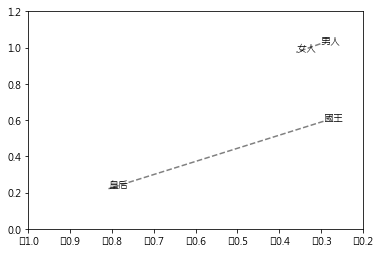

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

pca_output = []
words = ['國王', '皇后', '男人', '女人']

for w in words:
    index = labels.index(w)
    pca_output.append(X_reduced[index])

x = []
y = []
for value in pca_output:
    x.append(value[0])
    y.append(value[1])

for i in range(0, len(x), 2):
    plt.plot(x[i:i+2], y[i:i+2], 'r--',color = "grey")

for i in range(len(x)):
    plt.annotate(words[i],xy=(x[i], y[i]))

plt.ylim(0, 1.2)
plt.xlim(-1, -0.2)
plt.show()

In [10]:
def avg_w2v_vector(text_list):
    sum_vec = sum([model[word] if word in model else np.zeros(300) for word in text_list])
    result = sum_vec/len(text_list)  
    return result

df['doc_vec'] = df['token_text'].apply(lambda x: avg_w2v_vector(x))
df.head(5)

,tag,text,token_text,doc_vec
0,P,店家很給力，快遞也是相當快，第三次光顧啦,"[店家, 很, 給力, ，, 快遞, 也, 是, 相當, 快, ，, 第三, 次, 光顧, 啦]","[-0.03402686771005392, 0.06184592949492591, -0..."
1,N,這樣的配置用Vista系統還是有點卡。 指紋收集器。 沒送原裝滑鼠還需要自己買，不太好。,"[這樣, 的, 配置, 用, Vista, 系統, 還是, 有點, 卡, 。, , 指紋,...","[-0.007446914512131896, -0.0062939717110046855..."
2,P,不錯，在同等檔次酒店中應該是值得推薦的！,"[不錯, ，, 在, 同等, 檔次, 酒店, 中, 應該, 是, 值得, 推薦, 的, ！]","[-0.10691024477665241, -0.03989670884150725, -..."
3,N,哎！ 不會是蒙牛乾的吧 嚴懲真凶！,"[哎, ！ , 不會, 是, 蒙, 牛乾, 的, 吧, , 嚴懲, 真, 凶, ！]","[0.01443662358304629, -0.04190618630785208, 0...."
4,N,空尤其是三立電視臺女主播做的序尤其無趣像是硬湊那麼多字,"[空, 尤其, 是, 三立, 電視臺, 女, 主播, 做, 的, 序, 尤其, 無趣, 像是...","[-0.11447197, -0.0063643046, 0.1537531, 0.1133..."


## Model

### train/test split 

In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2, random_state = 123)
print(len(train))
print(len(test))

5110
1278


### train 

In [39]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(list(train['doc_vec']), train['tag'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### test 

In [41]:
result = svm_model.predict(list(test['doc_vec']))
print(result)

['P' 'P' 'P' ... 'P' 'P' 'P']


In [44]:
test['predict_svm'] = result
test.head(5)

/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tag,text,token_text,doc_vec,predict_svm
2019,N,好，物流也快，就是安裝費花了200，有點貴。,"[好, ，, 物流, 也, 快, ，, 就, 是, 安裝費, 花, 了, 200, ，, 有...","[-0.08342421057750471, -0.014780480531044304, ...",P
2881,P,質感，輕巧。外觀時尚，價格合理,"[質感, ，, 輕巧, 。, 外觀, 時尚, ，, 價格, 合理]","[-0.08880039946072632, -0.09217396958006753, 0...",P
4037,P,很滿意，全5分,"[很, 滿意, ，, 全, 5, 分]","[-0.08709055682023366, -0.10826296731829643, 0...",P
222,P,金屬外殼，看起比較上檔次。攜帶方便，大一點的包都裝的下。還有正版系統盤，馬上感到放心多了。,"[金屬, 外殼, ，, 看起, 比較, 上, 檔次, 。, 攜帶, 方便, ，, 大, 一點...","[-0.08604101920179252, -0.038842485093607985, ...",P
1479,P,"優點大家說得都差不多了.對於支援國產品牌來說,聯想真的是個不錯的選擇.","[優點, 大家, 說, 得, 都, 差不多, 了, ., 對於, 支援, 國產, 品牌, 來...","[-0.052145246, 0.027451375, -0.04499321, 0.092...",P


### accuracy 

In [45]:
print(sum(test['tag']==test['predict_svm'])/len(test))

0.8849765258215962


### confusion matrix 

In [46]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test['tag'],test['predict_svm'],labels=['P', 'N'])
print(conf)
pd.DataFrame(conf, index=['true(P)', 'true(N)'], columns=['pred(P)', 'pred(N)'])

[[525  97]
 [ 50 606]]


,pred(P),pred(N)
true(P),525,97
true(N),50,606


In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(list(train['doc_vec']), train['tag'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
result = logreg.predict(list(test['doc_vec']))
test['predict_log'] = result
test.head(5)

/Users/shihhan/Documents/Text_Mining/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tag,text,token_text,doc_vec,predict_svm,predict_log
2019,N,好，物流也快，就是安裝費花了200，有點貴。,"[好, ，, 物流, 也, 快, ，, 就, 是, 安裝費, 花, 了, 200, ，, 有...","[-0.08342421057750471, -0.014780480531044304, ...",P,P
2881,P,質感，輕巧。外觀時尚，價格合理,"[質感, ，, 輕巧, 。, 外觀, 時尚, ，, 價格, 合理]","[-0.08880039946072632, -0.09217396958006753, 0...",P,P
4037,P,很滿意，全5分,"[很, 滿意, ，, 全, 5, 分]","[-0.08709055682023366, -0.10826296731829643, 0...",P,P
222,P,金屬外殼，看起比較上檔次。攜帶方便，大一點的包都裝的下。還有正版系統盤，馬上感到放心多了。,"[金屬, 外殼, ，, 看起, 比較, 上, 檔次, 。, 攜帶, 方便, ，, 大, 一點...","[-0.08604101920179252, -0.038842485093607985, ...",P,P
1479,P,"優點大家說得都差不多了.對於支援國產品牌來說,聯想真的是個不錯的選擇.","[優點, 大家, 說, 得, 都, 差不多, 了, ., 對於, 支援, 國產, 品牌, 來...","[-0.052145246, 0.027451375, -0.04499321, 0.092...",P,P


In [49]:
print(sum(test['tag']==test['predict_log'])/len(test))

0.8716744913928013


## Demo 

In [53]:
text = '這手機不好用'
text = ws([text])[0]
print(text)
vec = sum([model[word] if word in model else np.zeros(300) for word in text])
result = logreg.predict(np.reshape(vec,(1,300)))
print(result)

['這', '手機', '不', '好用']
['N']


In [54]:
text = '這手機好用不'
text = ws([text])[0]
print(text)
vec = sum([model[word] if word in model else np.zeros(300) for word in text])
result = logreg.predict(np.reshape(vec,(1,300)))
print(result)

['這', '手機', '好用', '不']
['N']
